In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [ ]:
df = pd.read_csv('pollution_2000_2021.csv')
df.dropna(inplace = True)
df.reset_index(drop=True, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               608699 non-null  object 
 1   Year               608699 non-null  int64  
 2   Month              608699 non-null  int64  
 3   Day                608699 non-null  int64  
 4   Address            608699 non-null  object 
 5   State              608699 non-null  object 
 6   County             608699 non-null  object 
 7   City               608699 non-null  object 
 8   O3 Mean            608699 non-null  float64
 9   O3 1st Max Value   608699 non-null  float64
 10  O3 1st Max Hour    608699 non-null  int64  
 11  O3 AQI             608699 non-null  int64  
 12  CO Mean            608699 non-null  float64
 13  CO 1st Max Value   608699 non-null  float64
 14  CO 1st Max Hour    608699 non-null  int64  
 15  CO AQI             608699 non-null  float64
 16  SO

In [ ]:
df.head()

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [ ]:
df = df[df['City'] == 'New York']

# Filter for date range
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'] >= '2013-01-01']

<ipython-input-6-6e0c58304664>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df = df[['O3 Mean', 'Date']]

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df = df.resample('M').mean()

In [ ]:
df

,O3 Mean
Date,
2013-01-31,0.016066
2013-02-28,0.020865
2013-03-31,0.029781
2013-04-30,0.032921
2013-05-31,0.028046
...,...
2021-05-31,0.035050
2021-06-30,0.032585
2021-07-31,0.035000


In [ ]:
df = df.reset_index()

In [ ]:
df

,Date,O3 Mean
0,2013-01-31,0.016066
1,2013-02-28,0.020865
2,2013-03-31,0.029781
3,2013-04-30,0.032921
4,2013-05-31,0.028046
...,...,...
100,2021-05-31,0.035050
101,2021-06-30,0.032585
102,2021-07-31,0.035000
103,2021-08-31,0.036418


In [ ]:
df.columns = ['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
100,2021-05-31,0.035050
101,2021-06-30,0.032585
102,2021-07-31,0.035000
103,2021-08-31,0.036418
104,2021-09-30,0.029889


<Axes: xlabel='ds'>

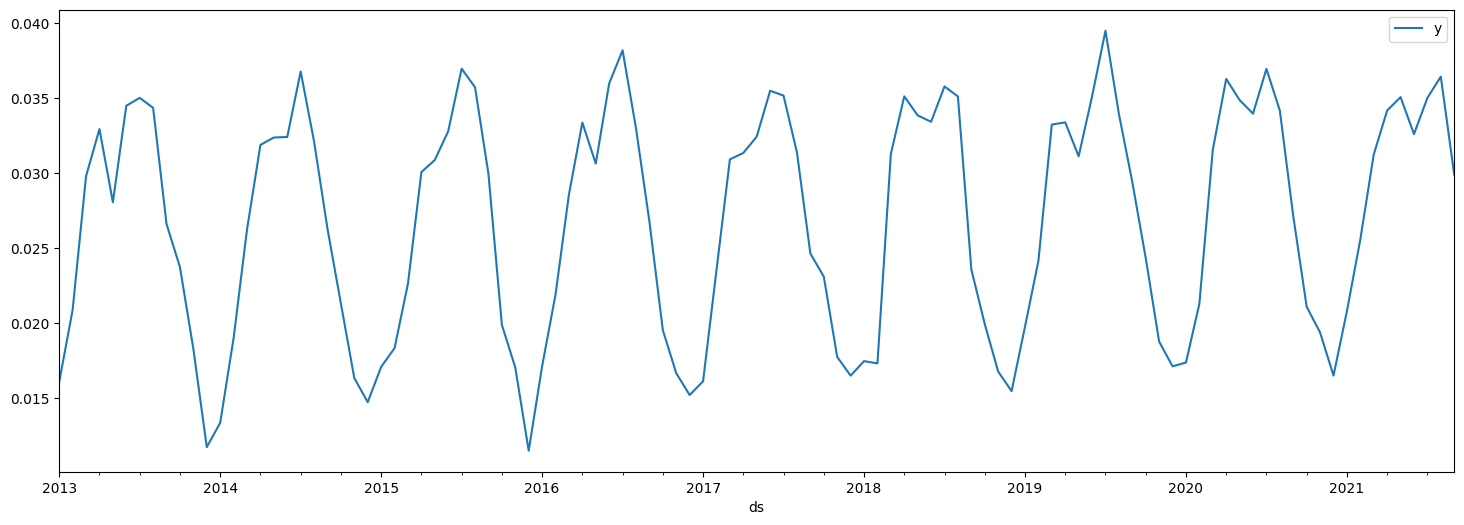

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [ ]:
import matplotlib.pyplot as plt

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdkwrtozd/8uczp3lc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdkwrtozd/7uwh_z3i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55746', 'data', 'file=/tmp/tmpdkwrtozd/8uczp3lc.json', 'init=/tmp/tmpdkwrtozd/7uwh_z3i.json', 'output', 'file=/tmp/tmpdkwrtozd/prophet_modelv1cw_pel/prophet_model-20240524170709.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:07:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:07:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


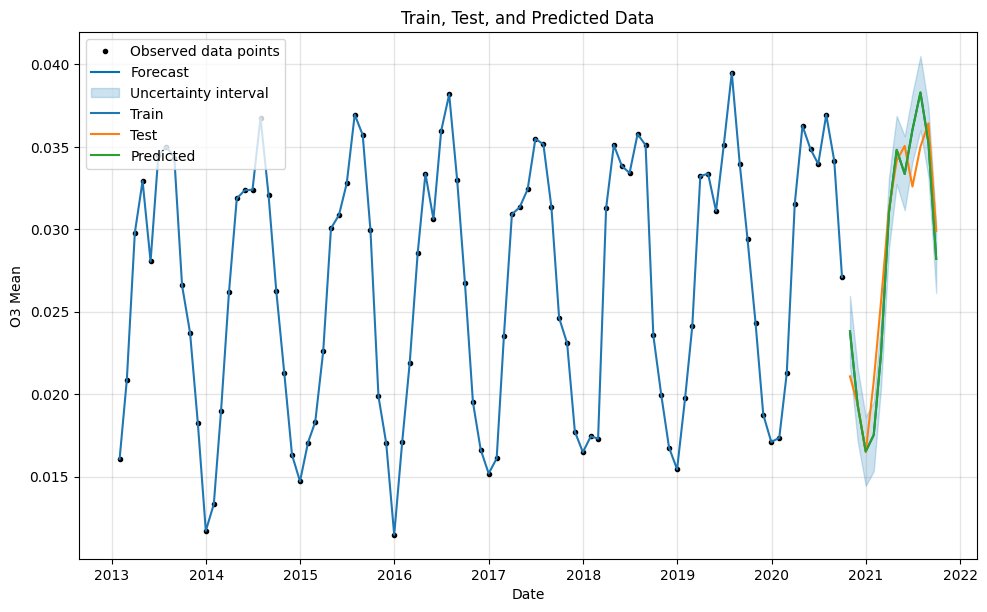

In [ ]:
model = Prophet()

# Fit the model to the training data
model.fit(train)

# Make predictions on the test data
forecast = model.predict(test)
fig = model.plot(forecast)
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('O3 Mean')
plt.title('Train, Test, and Predicted Data')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['y'], forecast['yhat'])
print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 0.0017841714496085925


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['y'], forecast['yhat'])
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 4.861425726065003e-06


In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365)
forecast= m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdkwrtozd/9e82z0sv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdkwrtozd/m0mw_7mn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92094', 'data', 'file=/tmp/tmpdkwrtozd/9e82z0sv.json', 'init=/tmp/tmpdkwrtozd/m0mw_7mn.json', 'output', 'file=/tmp/tmpdkwrtozd/prophet_modelpl1m65tn/prophet_model-20240524165308.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:53:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:53:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
453,2021-09-26,0.028458,0.031815,0.035951,0.028453,0.028464,0.005478,0.005478,0.005478,0.005478,0.005478,0.005478,0.0,0.0,0.0,0.033937
454,2021-09-27,0.028459,0.030825,0.035017,0.028454,0.028465,0.004392,0.004392,0.004392,0.004392,0.004392,0.004392,0.0,0.0,0.0,0.032852
455,2021-09-28,0.028460,0.029443,0.033664,0.028455,0.028466,0.003065,0.003065,0.003065,0.003065,0.003065,0.003065,0.0,0.0,0.0,0.031526
456,2021-09-29,0.028461,0.027773,0.032311,0.028456,0.028467,0.001509,0.001509,0.001509,0.001509,0.001509,0.001509,0.0,0.0,0.0,0.029970
457,2021-09-30,0.028462,0.026041,0.030318,0.028457,0.028468,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,0.0,0.0,0.0,0.028203


In [ ]:
test.tail()

,ds,y
100,2021-05-31,0.035050
101,2021-06-30,0.032585
102,2021-07-31,0.035000
103,2021-08-31,0.036418
104,2021-09-30,0.029889


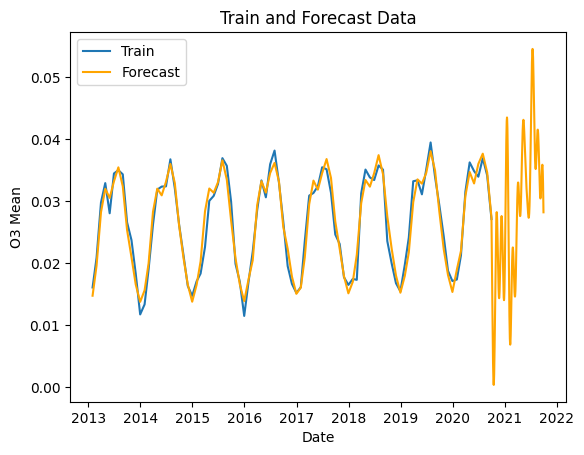

In [ ]:
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('O3 Mean')
plt.title('Train and Forecast Data')
plt.legend()
plt.show()